#DSCI 631: An Extensive Exploratory Data Analysis on Apple Stock Prices

Team Members

Group Members

Vijval Vemula: vv354@drexel.edu

Tyler Brenner: tb3327@drexel.edu

Priyanka Patil: pp673@drexel.edu

####Background for our analysis:

We have chosen to perform an extensive EDA on the stock prices of the apple company from 1980 - till date. We imported real time data from Yfinance API. This analysis of the Apple stock price data aims to provide valuable insights and support for investors, financial analysts, and traders. By visualizing the stock price trends, calculating summary statistics, and examining daily returns, it helps in understanding the historical performance and volatility of Apple stock. By analyzing significant events and outlier detection, the analysis contributes to making informed investment decisions. Moreover, volatility analysis and technical indicators provide additional tools for risk assessment and identifying potential buy/sell signals. Overall, this comprehensive analysis assists stakeholders in better understanding the historical behavior of Apple stock, potentially identifying profitable opportunities, and mitigating risks in their investment strategies.

In [1]:
import math
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)


<Axes: xlabel='Date'>

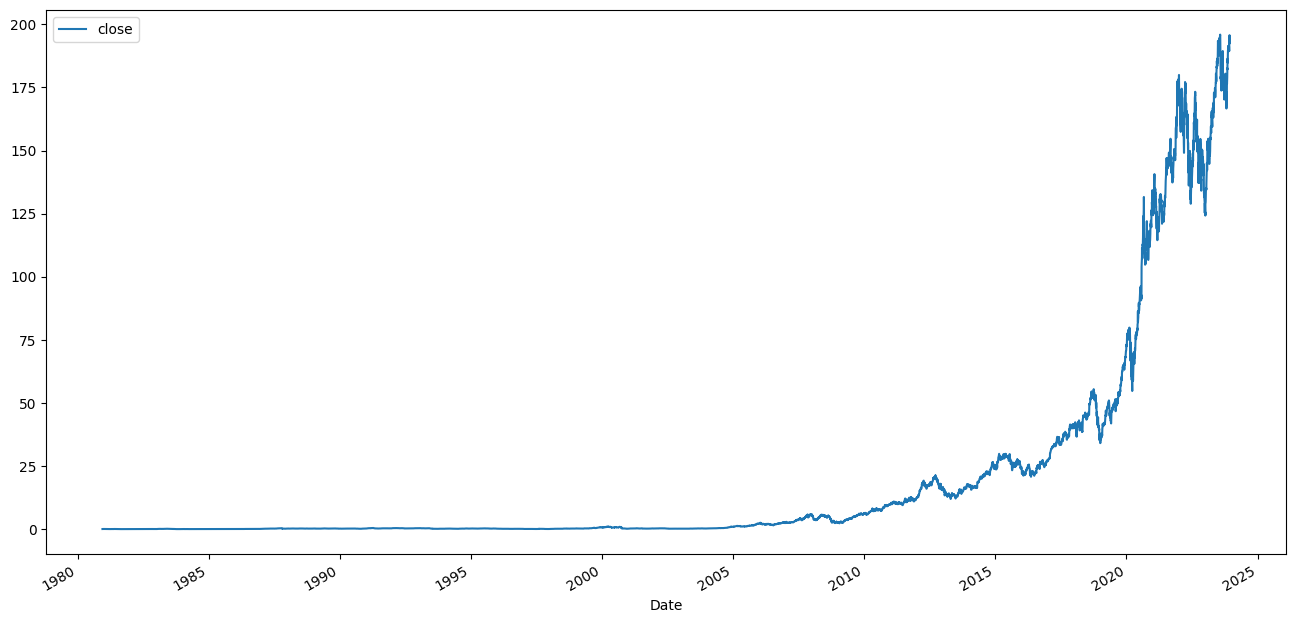

In [2]:
aapl = yf.Ticker("AAPL")
df = aapl.history(period = "max")
df = df.rename(columns = lambda x : x.lower())
df["adj_close"] = df["close"] - df["dividends"]
del df["dividends"]
del df["stock splits"]
df.plot.line(y = "close", use_index = True, figsize = (16, 8))

In [3]:
df

,open,high,low,close,volume,adj_close
Date,,,,,,
1980-12-12 00:00:00-05:00,0.099319,0.099751,0.099319,0.099319,469033600,0.099319
1980-12-15 00:00:00-05:00,0.094569,0.094569,0.094137,0.094137,175884800,0.094137
1980-12-16 00:00:00-05:00,0.087659,0.087659,0.087228,0.087228,105728000,0.087228
1980-12-17 00:00:00-05:00,0.089387,0.089818,0.089387,0.089387,86441600,0.089387
1980-12-18 00:00:00-05:00,0.091978,0.092410,0.091978,0.091978,73449600,0.091978
...,...,...,...,...,...,...
2023-12-05 00:00:00-05:00,190.210007,194.399994,190.179993,193.419998,66628400,193.419998
2023-12-06 00:00:00-05:00,194.449997,194.759995,192.110001,192.320007,41089700,192.320007
2023-12-07 00:00:00-05:00,193.630005,195.000000,193.589996,194.270004,47477700,194.270004


In [4]:
data = df.copy()

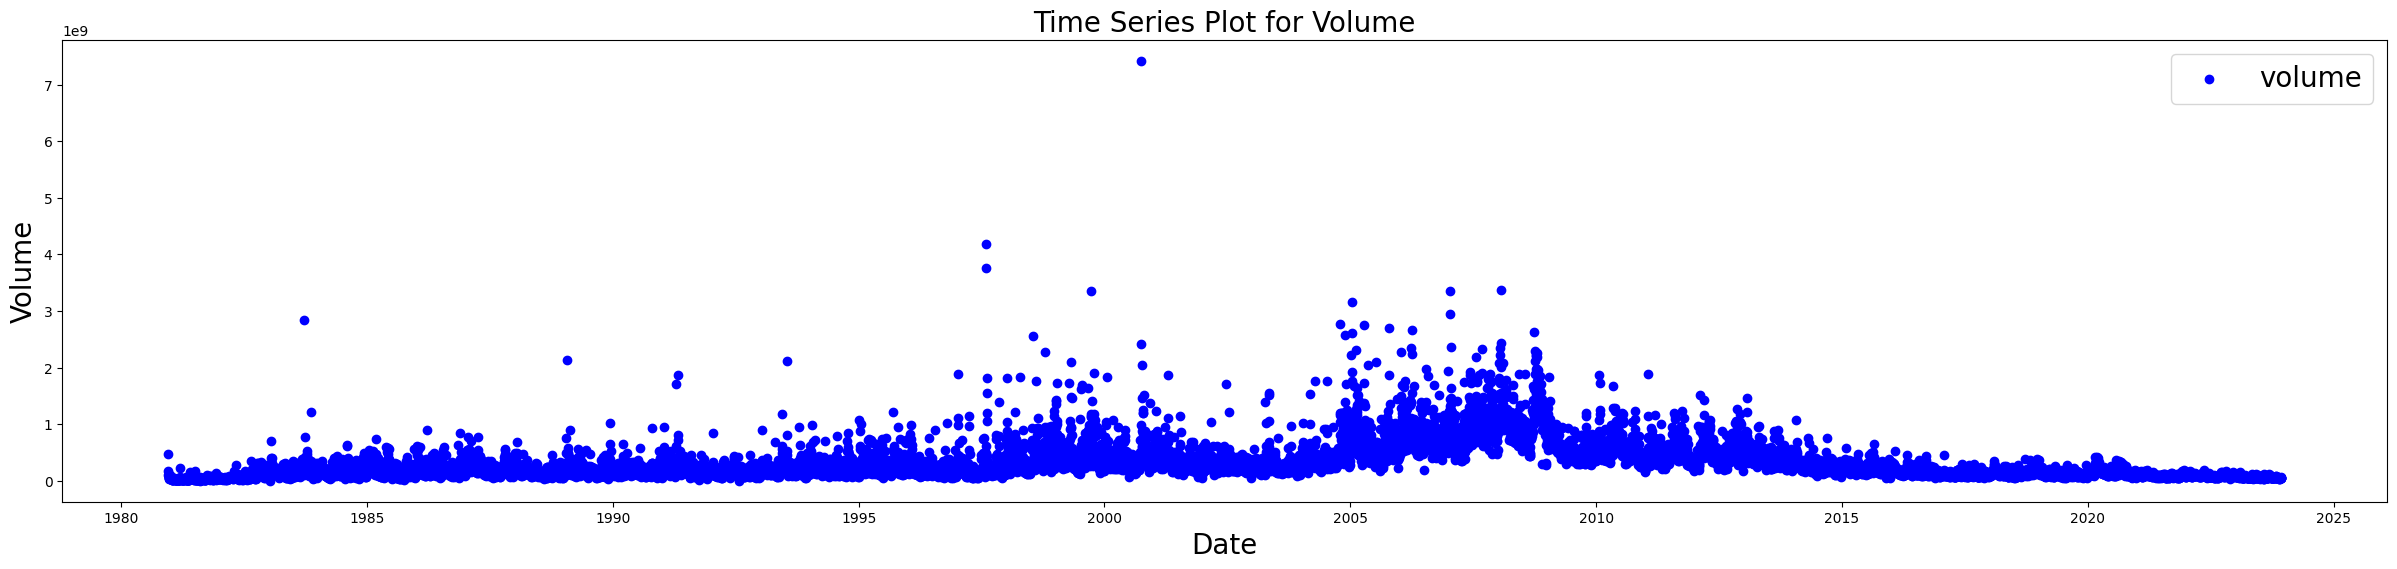

In [5]:
plt.figure(figsize=(30, 6))
plt.scatter(data.index, data['volume'], marker='o', linestyle='-', color='b', label='volume')
plt.xlabel('Date', fontsize=20)
plt.ylabel('Volume', fontsize=20)
plt.title('Time Series Plot for Volume', fontsize=20)
plt.legend(fontsize=20)

plt.show()

In [6]:
data['mean_of_prices'] = data[['open', 'high', 'low', 'close', 'adj_close']].mean(axis=1)
data.head()

,open,high,low,close,volume,adj_close,mean_of_prices
Date,,,,,,,
1980-12-12 00:00:00-05:00,0.099319,0.099751,0.099319,0.099319,469033600,0.099319,0.099405
1980-12-15 00:00:00-05:00,0.094569,0.094569,0.094137,0.094137,175884800,0.094137,0.094310
1980-12-16 00:00:00-05:00,0.087659,0.087659,0.087228,0.087228,105728000,0.087228,0.087400
1980-12-17 00:00:00-05:00,0.089387,0.089818,0.089387,0.089387,86441600,0.089387,0.089473
1980-12-18 00:00:00-05:00,0.091978,0.092410,0.091978,0.091978,73449600,0.091978,0.092065


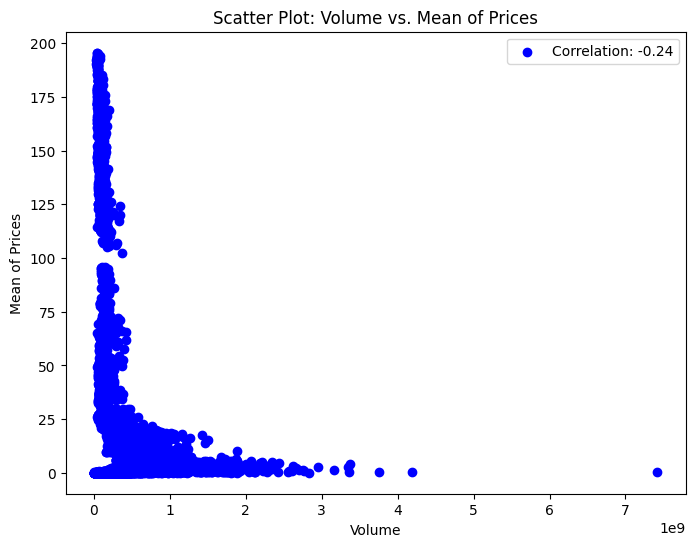

In [7]:
correlation = data['volume'].corr(data['mean_of_prices'])

plt.figure(figsize=(8, 6))
plt.scatter(data['volume'], data['mean_of_prices'], color='b', label=f'Correlation: {correlation:.2f}')
plt.xlabel('Volume')
plt.ylabel('Mean of Prices')
plt.title('Scatter Plot: Volume vs. Mean of Prices')
plt.legend()
plt.grid(False)

plt.show()

In [8]:
data = data.drop('mean_of_prices', axis=1)
data.head()


,open,high,low,close,volume,adj_close
Date,,,,,,
1980-12-12 00:00:00-05:00,0.099319,0.099751,0.099319,0.099319,469033600,0.099319
1980-12-15 00:00:00-05:00,0.094569,0.094569,0.094137,0.094137,175884800,0.094137
1980-12-16 00:00:00-05:00,0.087659,0.087659,0.087228,0.087228,105728000,0.087228
1980-12-17 00:00:00-05:00,0.089387,0.089818,0.089387,0.089387,86441600,0.089387
1980-12-18 00:00:00-05:00,0.091978,0.092410,0.091978,0.091978,73449600,0.091978


In [9]:
data.fillna(0, inplace=True)
data['daily_return']= data['close'].pct_change()
data = data.dropna()
data.head()

,open,high,low,close,volume,adj_close,daily_return
Date,,,,,,,
1980-12-15 00:00:00-05:00,0.094569,0.094569,0.094137,0.094137,175884800,0.094137,-0.052171
1980-12-16 00:00:00-05:00,0.087659,0.087659,0.087228,0.087228,105728000,0.087228,-0.073398
1980-12-17 00:00:00-05:00,0.089387,0.089818,0.089387,0.089387,86441600,0.089387,0.024751
1980-12-18 00:00:00-05:00,0.091978,0.092410,0.091978,0.091978,73449600,0.091978,0.028993
1980-12-19 00:00:00-05:00,0.097591,0.098023,0.097591,0.097591,48630400,0.097591,0.061028


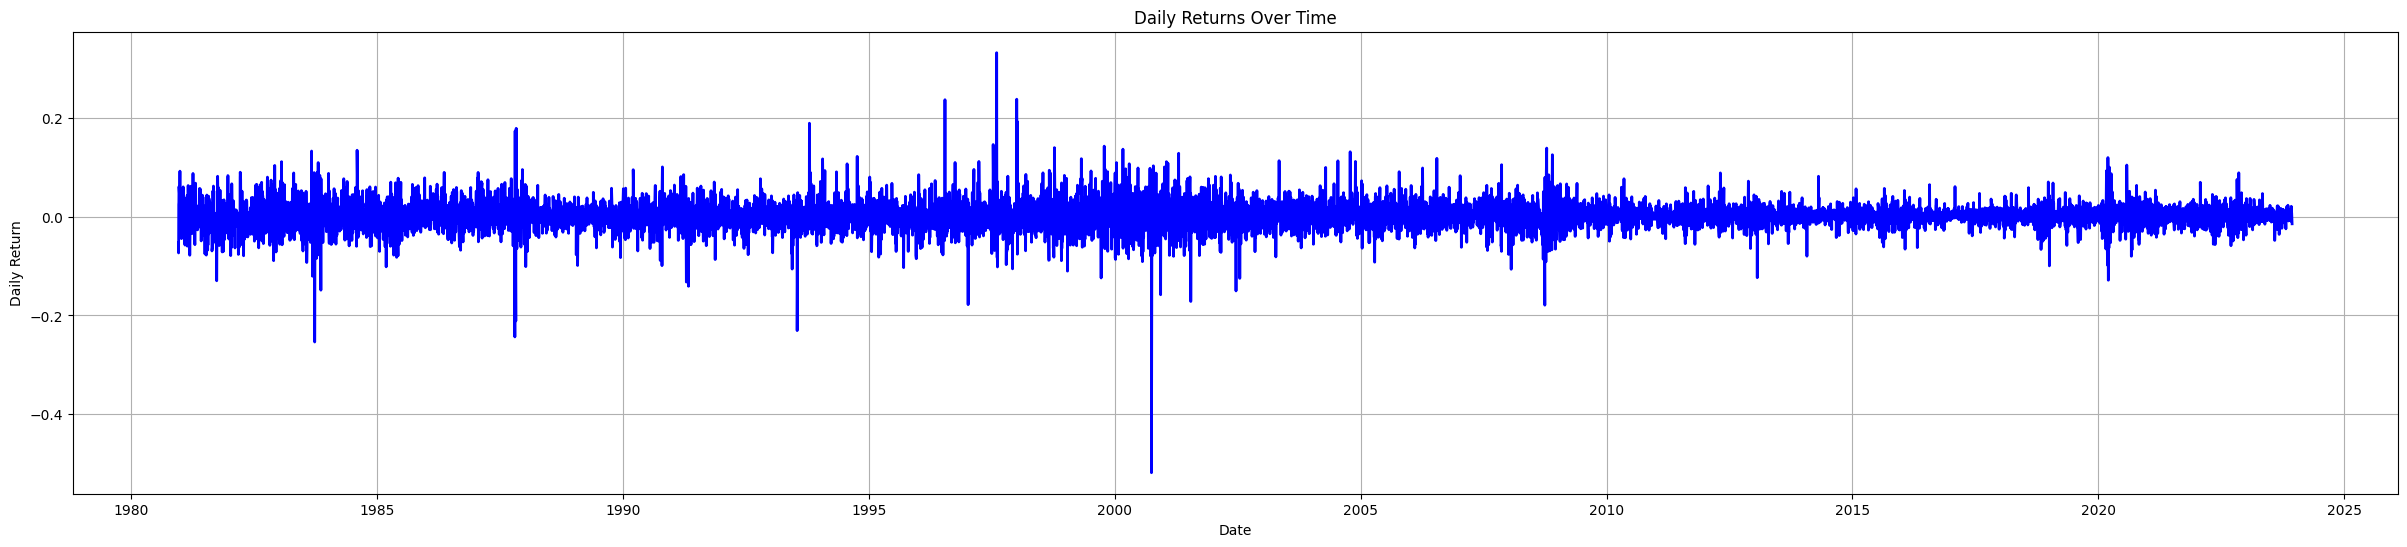

In [10]:
plt.figure(figsize=(30,6))
plt.plot(data.index, data['daily_return'], color='blue', linewidth=2)
plt.title('Daily Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.grid(True)
plt.show()

In [11]:
risk = data["daily_return"].std()


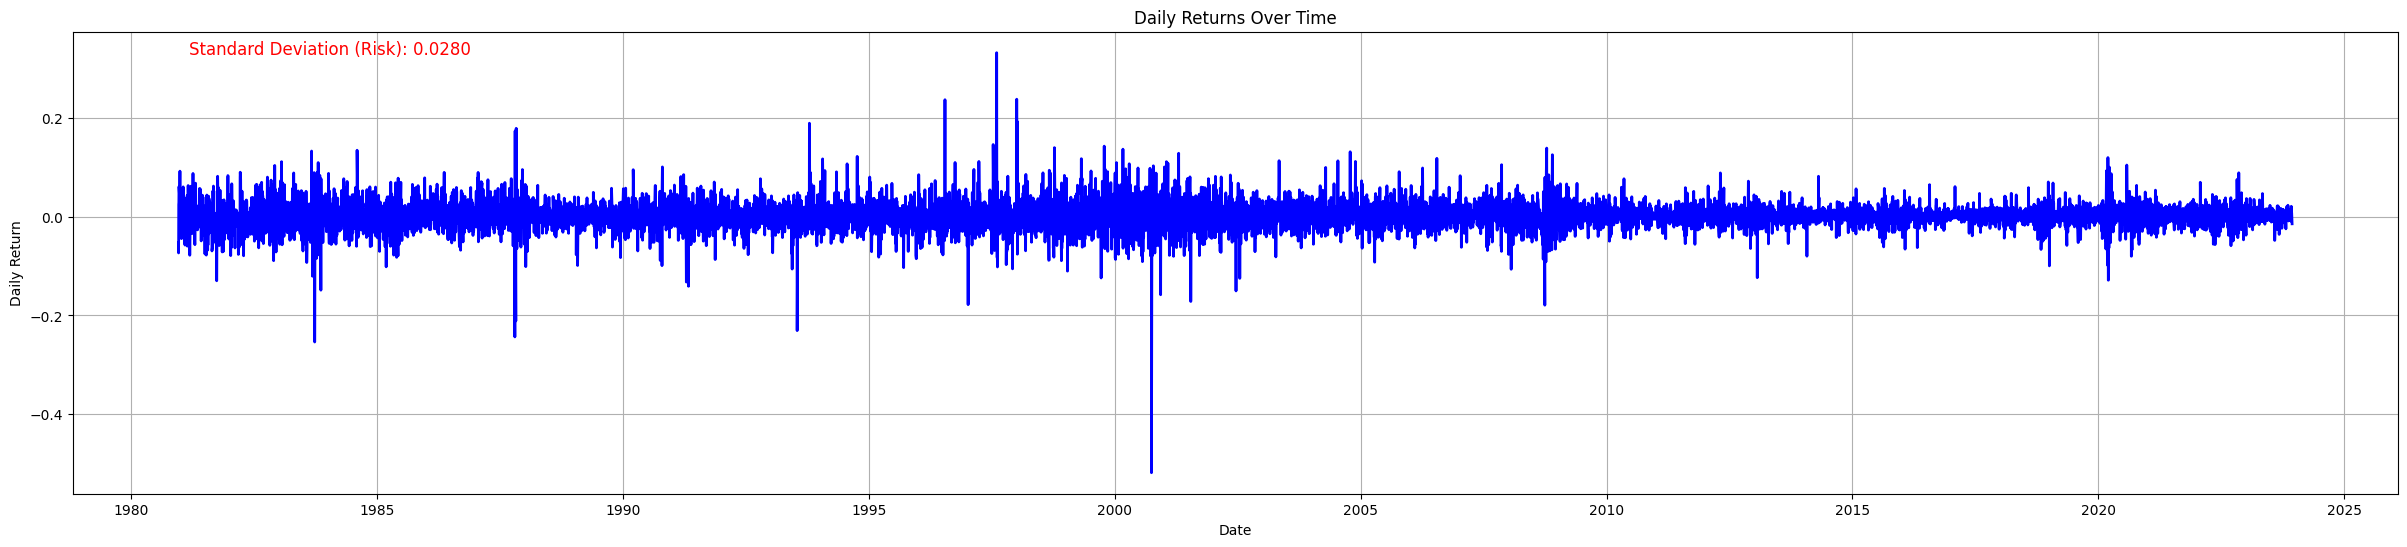

In [12]:
plt.figure(figsize=(30, 6))
plt.plot(data.index, data['daily_return'], color= "blue", linewidth=2)
plt.title('Daily Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.grid(True)

plt.annotate(f'Standard Deviation (Risk): {risk:.4f}',
             xy=(0.05, 0.95), xycoords='axes fraction',
             fontsize=12, color='red')

plt.show()

In [13]:
mean = data['daily_return'].mean()
mean

0.001098537570560551

Explanation: The mean return of 0.001 informs the user that the investment has a small positive daily return: which represents a relatively stable performance over time. The risk value of 0.02 represents the standard deviation of daily returns. It informs the user that the stock's daily returns show relatively moderate volatility.

Outlier Detection:


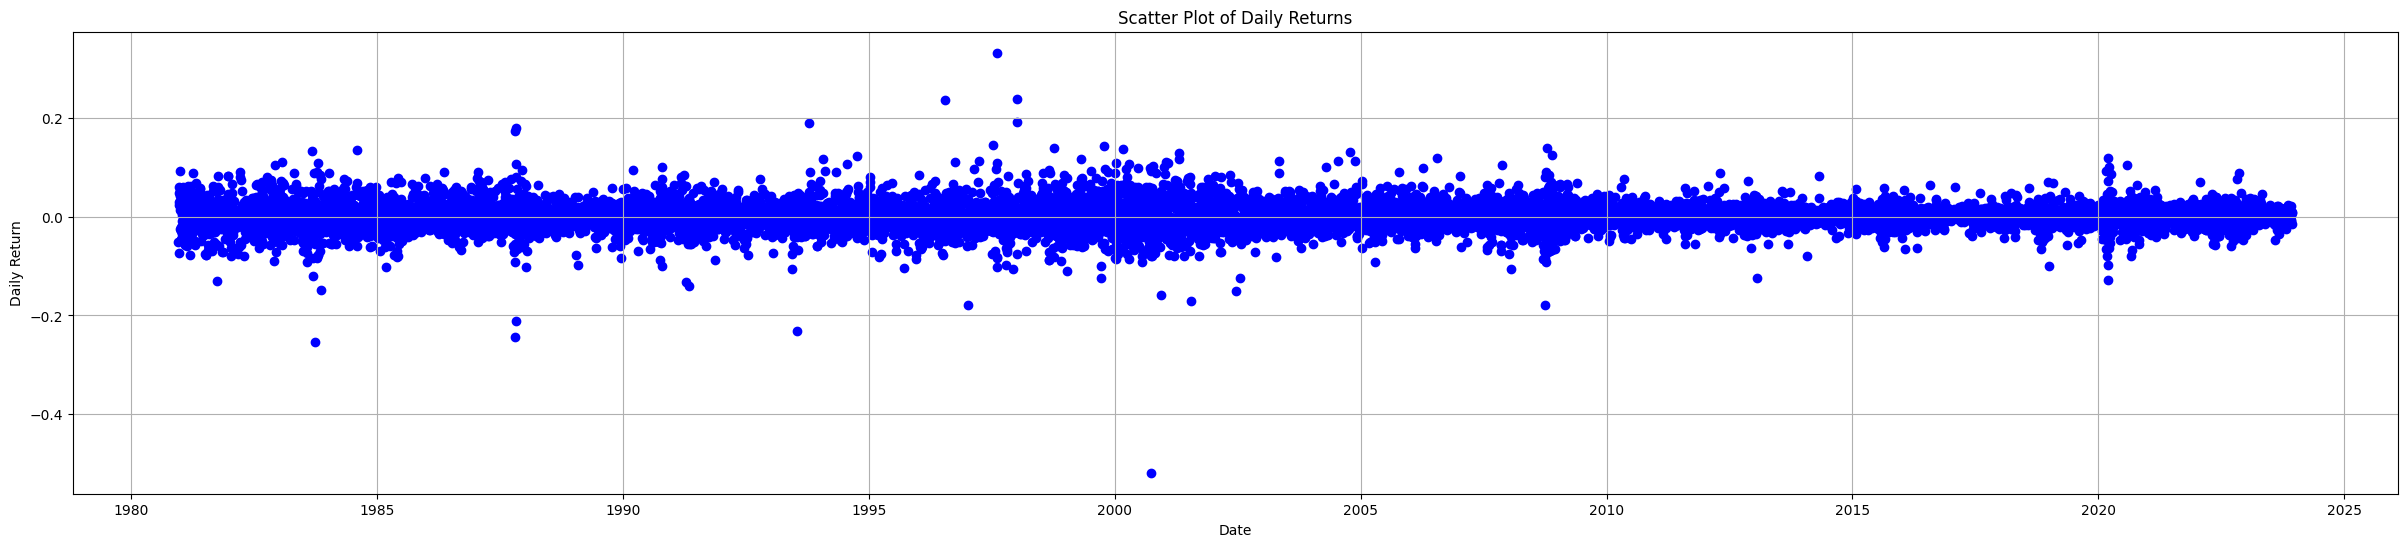

In [14]:
plt.figure(figsize=(30, 6))
plt.scatter(data.index, data['daily_return'], color='blue')
plt.title('Scatter Plot of Daily Returns')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.grid(True)
plt.show()

In [15]:
!pip3 install --upgrade -U statsmodels

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose


In [17]:
data.columns

Index(['open', 'high', 'low', 'close', 'volume', 'adj_close', 'daily_return'], dtype='object')

In [18]:
data.index

DatetimeIndex(['1980-12-15 00:00:00-05:00', '1980-12-16 00:00:00-05:00',
               '1980-12-17 00:00:00-05:00', '1980-12-18 00:00:00-05:00',
               '1980-12-19 00:00:00-05:00', '1980-12-22 00:00:00-05:00',
               '1980-12-23 00:00:00-05:00', '1980-12-24 00:00:00-05:00',
               '1980-12-26 00:00:00-05:00', '1980-12-29 00:00:00-05:00',
               ...
               '2023-11-28 00:00:00-05:00', '2023-11-29 00:00:00-05:00',
               '2023-11-30 00:00:00-05:00', '2023-12-01 00:00:00-05:00',
               '2023-12-04 00:00:00-05:00', '2023-12-05 00:00:00-05:00',
               '2023-12-06 00:00:00-05:00', '2023-12-07 00:00:00-05:00',
               '2023-12-08 00:00:00-05:00', '2023-12-11 00:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=10839, freq=None)

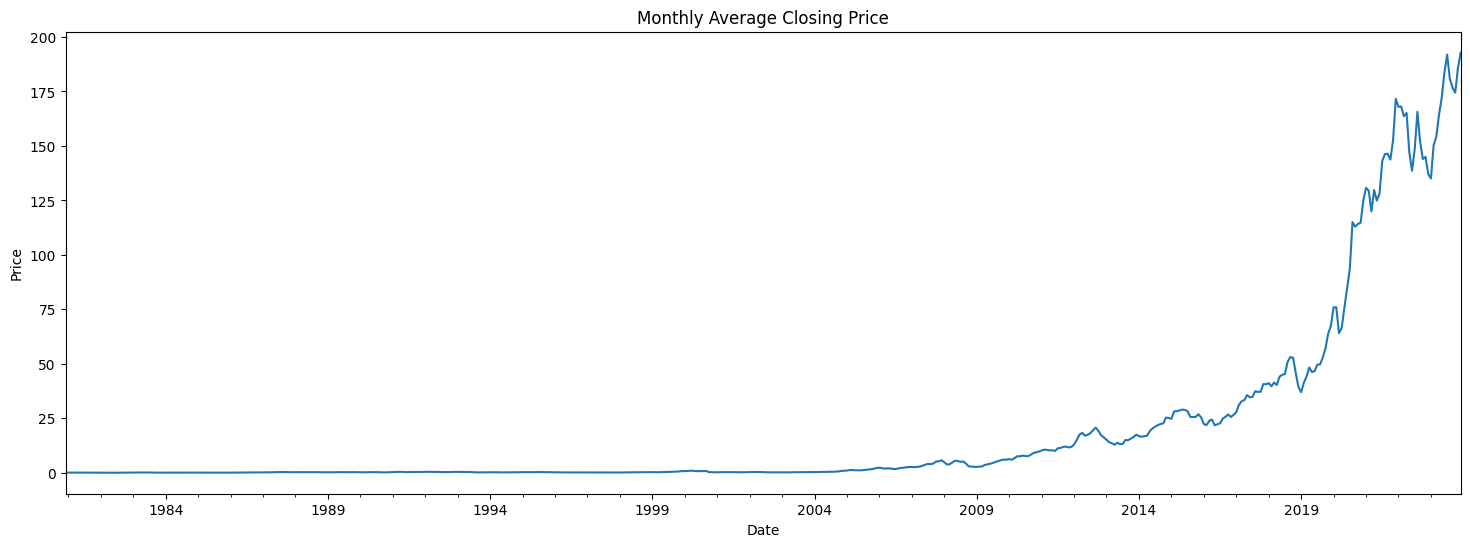

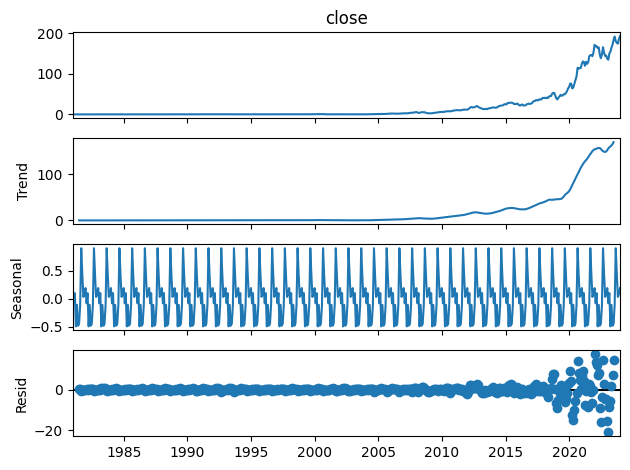

In [19]:
monthly_data = data.resample('M').mean()
monthly_data['close'].plot(figsize=(18,6))
plt.title('Monthly Average Closing Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(False)
plt.show()
result = seasonal_decompose(monthly_data['close'], model='additive')
result.plot()
plt.grid(False)
plt.show()

In [20]:
data.head()

,open,high,low,close,volume,adj_close,daily_return
Date,,,,,,,
1980-12-15 00:00:00-05:00,0.094569,0.094569,0.094137,0.094137,175884800,0.094137,-0.052171
1980-12-16 00:00:00-05:00,0.087659,0.087659,0.087228,0.087228,105728000,0.087228,-0.073398
1980-12-17 00:00:00-05:00,0.089387,0.089818,0.089387,0.089387,86441600,0.089387,0.024751
1980-12-18 00:00:00-05:00,0.091978,0.092410,0.091978,0.091978,73449600,0.091978,0.028993
1980-12-19 00:00:00-05:00,0.097591,0.098023,0.097591,0.097591,48630400,0.097591,0.061028


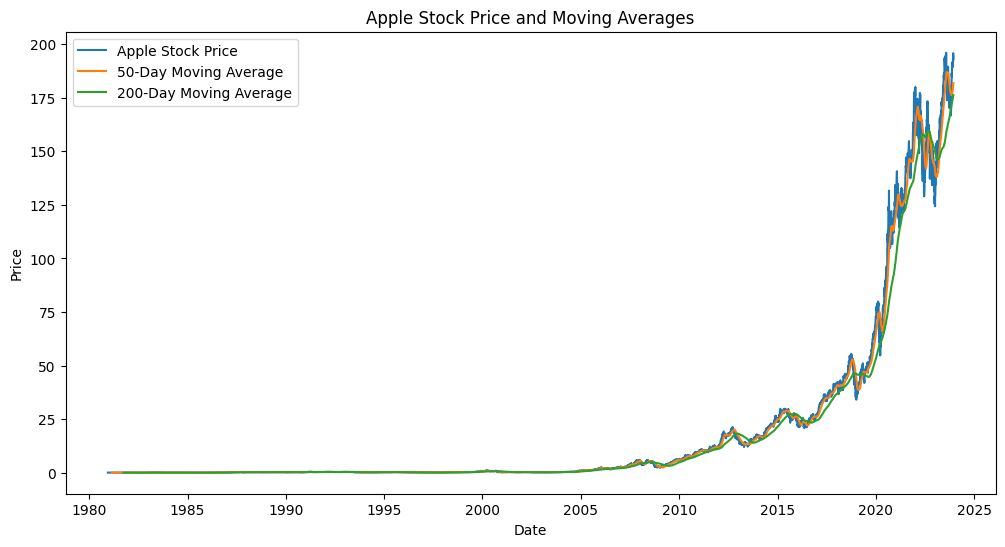

In [21]:
data['50_Day_MA'] = data['close'].rolling(window=50).mean()
data['200_Day_MA'] = data['close'].rolling(window=200).mean()
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['close'], label='Apple Stock Price')
plt.plot(data.index, data['50_Day_MA'], label='50-Day Moving Average')
plt.plot(data.index, data['200_Day_MA'], label='200-Day Moving Average')
plt.title('Apple Stock Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(False)
plt.legend()
plt.show()

What is observed in the Moving Averages graph is that the stock price was basically at the same rate as both the 50-Day and 200-Day Moving Averages from the start until around 2008. This could indicate that the market was in a period of balance and the amount of buyers and sellers of the stock matched which led to the lack of significant price movement. Also, traders could have been indecisive and wanted to test the waters to determine the stock's direction. From the period of about 2008 until 2021, the stock was higher than both Moving Averages. This could indicate that the stock is in an uptrend phase. This would also suggest that the stocks recent performance has been strong and the long-term trend is positive. From 2021 on, you will notice that the Moving Averages were higher than the stock price and this can indicate that the stock may see a downtrend which would suggest the recent performance of the stock has been weaker and is lagging behind its historical averages. Traders may interpret these moving averages as barries that the stock needs to overcome in order to regain bullish momentum.

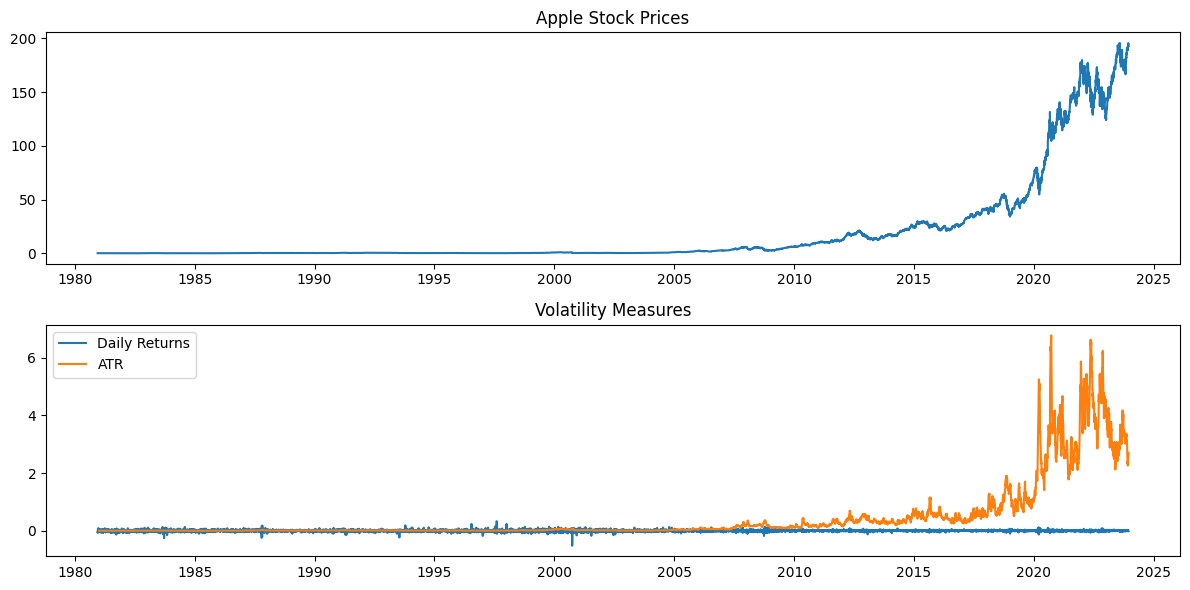

Standard Deviation (Volatility): 0.028036482322198877


In [22]:
volatility_std = data["daily_return"].std()

data["High_Low_Diff"] = data["high"] - data["low"]
data["High_Previousclose_Diff"] = np.abs(data["high"] - data["close"].shift(1))
data["Low_Previousclose_Diff"] = np.abs(data["low"] - data["close"].shift(1))
data["ATR"] = data[["High_Low_Diff", "High_Previousclose_Diff", "Low_Previousclose_Diff"]].max(axis=1).rolling(window=14).mean()

plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(data["close"])
plt.title("Apple Stock Prices")

plt.subplot(2, 1, 2)
plt.plot(data["daily_return"], label="Daily Returns")
plt.plot(data["ATR"], label="ATR")
plt.legend()
plt.title("Volatility Measures")

plt.tight_layout()
plt.show()

print("Standard Deviation (Volatility):", volatility_std)

A standard deviation of 0.028036482322198877 indicates the daily returns of Apple stock have exhibited relatively limited variability around their mean. This suggest that the stock's price movements have been relatively stable over the analyzed period. As you can see the Daily Returns and ATR were on the same horizontal line meaning that the stock was pretty consistent and predictable. Over time, the stock had gotten alittle more inconsistent and more unpredictable.

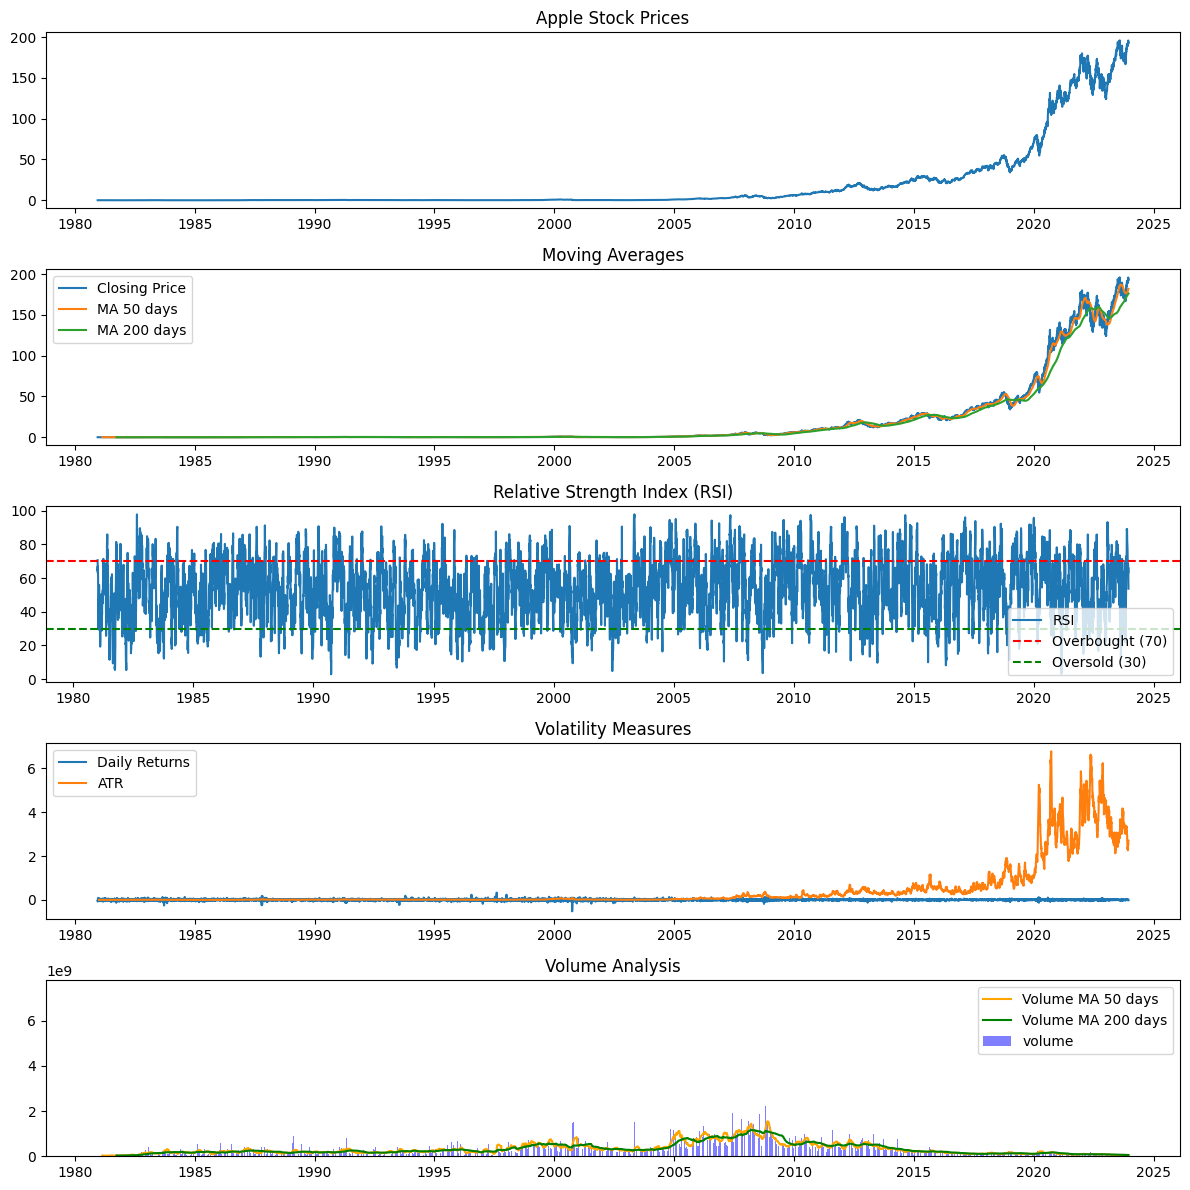

Standard Deviation (Volatility): 0.028036482322198877


In [23]:
# Calculate Moving Averages (MA)
data["MA_50"] = data["close"].rolling(window=50).mean()
data["MA_200"] = data["close"].rolling(window=200).mean()

# Calculate Relative Strength Index (RSI)
def calculate_rsi(data, window=14):
    delta = data["close"].diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

data["RSI"] = calculate_rsi(data)

# Calculate Daily Returns and ATR
data["High_Low_Diff"] = data["high"] - data["low"]
data["High_Previousclose_Diff"] = np.abs(data["high"] - data["close"].shift(1))
data["Low_Previousclose_Diff"] = np.abs(data["low"] - data["close"].shift(1))
data["ATR"] = data[["High_Low_Diff", "High_Previousclose_Diff", "Low_Previousclose_Diff"]].max(axis=1).rolling(window=14).mean()

# Volume Analysis
data["Volume_MA_50"] = data["volume"].rolling(window=50).mean()
data["Volume_MA_200"] = data["volume"].rolling(window=200).mean()

# Plotting
plt.figure(figsize=(12, 12))

#Plot Apple stock
plt.subplot(5, 1, 1)
plt.plot(data["close"])
plt.title("Apple Stock Prices")

# Plot Stock Prices and Moving Averages
plt.subplot(5, 1, 2)
plt.plot(data["close"], label="Closing Price")
plt.plot(data["MA_50"], label="MA 50 days")
plt.plot(data["MA_200"], label="MA 200 days")
plt.legend()
plt.title("Moving Averages")

# Plot RSI
plt.subplot(5, 1, 3)
plt.plot(data["RSI"], label="RSI")
plt.axhline(y=70, color='r', linestyle='--', label="Overbought (70)")
plt.axhline(y=30, color='g', linestyle='--', label="Oversold (30)")
plt.legend()
plt.title("Relative Strength Index (RSI)")

# Plot Daily Returns and ATR
plt.subplot(5, 1, 4)
plt.plot(data["daily_return"], label="Daily Returns")
plt.plot(data["ATR"], label="ATR")
plt.legend()
plt.title("Volatility Measures")

# Plot Volume and Volume Moving Averages
plt.subplot(5, 1, 5)
plt.bar(data.index, data["volume"], label="volume", color='blue', alpha=0.5)
plt.plot(data["Volume_MA_50"], label="Volume MA 50 days", color='orange')
plt.plot(data["Volume_MA_200"], label="Volume MA 200 days", color='green')
plt.legend()
plt.title("Volume Analysis")

plt.tight_layout()
plt.show()


print("Standard Deviation (Volatility):", data["daily_return"].std())


Standard deviation is commonly used as a measure of volatility in financial analysis, especially when dealing with price movements. It's a statistical measure that quantifies the amount of dispersion or variability of a set of data points from the mean (average). In the context of financial markets and stock prices, volatility refers to the magnitude of price fluctuations over a specific period of time. Here's why standard deviation is used for volatility analysis. On the other hand, technical indicators and volume analysis focus on other aspects of market behavior, such as trends, momentum, and trading activity, which don't necessarily require measuring variability through standard deviation.

Breakdown of each factor based on theBreakdown of each factor based on the code provided:

####1. Moving Averages (MA):
Moving averages smooth out price data over a specific period of time to identify trends and eliminate short-term fluctuations.
The 50-day and 200-day moving averages are commonly used in technical analysis to identify long-term and intermediate trends.
When the price crosses above the MA, it could signal a potential upward trend, and vice versa.
####2. Relative Strength Index (RSI):
RSI is a momentum oscillator that measures the speed and change of price movements.
RSI values above 70 are considered overbought, suggesting a potential price reversal or correction.
RSI values below 30 are considered oversold, suggesting a potential upward reversal.
####3. Daily Returns:
Daily returns represent the percentage change in the closing price from one day to the next.
It provides insight into how much the price changes from day to day, indicating short-term volatility.
Positive returns suggest price increases, while negative returns suggest price decreases.
4.Average True Range (ATR):
ATR measures volatility by considering the range between high and low prices along with the previous day's close.
It provides an average of the largest of the following three values: high-low range, high-previous close, low-previous close.
A higher ATR value indicates higher volatility, while a lower value suggests lower volatility.
####5. Volume Analysis:
Volume reflects the number of shares or contracts traded during a specific time period.
It's used to confirm the strength of price movements: higher volume during price increases indicates strong buying interest.
Volume moving averages (MA) smooth out volume data to identify trends in trading activity